<a href="https://colab.research.google.com/github/Prajwal011/LLM-s/blob/main/Link_Sage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q -U langchain langchain_community transformers langchain-openai \
langchain-huggingface streamlit pyngrok unstructured tiktoken faiss-cpu huggingface

#Accessing DeepSeek using huggingface InferenceClient Api

In [ ]:
from huggingface_hub import InferenceClient

client = InferenceClient(
	provider="together",
	api_key="hf_token"
)

messages = [
	{
		"role": "user",
		"content": "What is the capital of France?"
	}
]

completion = client.chat.completions.create(
    model="deepseek-ai/DeepSeek-R1",
	messages=messages,
	max_tokens=500
)

print(completion.choices[0].message)

#Link Sage app code

In [ ]:
%%writefile linksage.py
import os
import streamlit as st
import pickle
import time
from huggingface_hub import InferenceClient
from langchain.chains import RetrievalQAWithSourcesChain
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import UnstructuredURLLoader, TextLoader
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings, SentenceTransformerEmbeddings
from langchain_community.llms import HuggingFaceEndpoint

# 🔹 **Streamlit UI Setup**
st.title("LinkSage 🔎")
st.sidebar.title("URLs")

urls = []
for i in range(3):
    url = st.sidebar.text_input(f"URL {i+1}")
    urls.append(url)

process_url_clicked = st.sidebar.button("Process URLs")
file_path = "faiss_store_openai.pkl"
main_placeholder = st.empty()

# 🔹 **LLM Setup (Hugging Face Inference)**
client = InferenceClient(
    provider="together",
    api_key="hf_token"  # Add your API key
)


# 🔹 **Process URLs & Build FAISS Index**
if process_url_clicked:
    # Step 1: Load Data (from URLs & Local File)
    loader = UnstructuredURLLoader(urls=urls)
    main_placeholder.text("Data Loading...Started...✅✅✅")
    data = loader.load()

    # Load local file (`rag.txt`) as additional context
    local_loader = TextLoader("rag.txt")
    local_docs = local_loader.load()
    data.extend(local_docs)  # Combine URL & local file data

    # Step 2: Split Data into Chunks
    text_splitter = RecursiveCharacterTextSplitter(
        separators=['\n\n', '\n', '.', ','],
        chunk_size=1000
    )
    main_placeholder.text("Text Splitter...Started...✅✅✅")
    docs = text_splitter.split_documents(data)

    # Step 3: Create Embeddings & FAISS Vector Store
    embeddings = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
    vectorstore = FAISS.from_documents(docs, embeddings)
    main_placeholder.text("Embedding Vector Started Building...✅✅✅")
    time.sleep(1)

    # Step 4: Save FAISS Index to File
    with open(file_path, "wb") as f:
        pickle.dump(vectorstore, f)

    main_placeholder.text("FAISS Index Saved Successfully! ✅✅✅")

# 🔹 **User Query Handling**
query = main_placeholder.text_input("Question: ")
if query:
    if os.path.exists(file_path):
        with open(file_path, "rb") as f:
            vectorstore = pickle.load(f)

        # Step 5: Retrieve Top-3 Relevant Docs using FAISS
        k = 3  # Number of nearest neighbors
        retrieved_docs = vectorstore.similarity_search(query, k)

        # Display retrieved documents
        # st.subheader("🔍 Top 3 Relevant Documents:")
        context = ""
        for i, doc in enumerate(retrieved_docs):
        #     st.write(f"**Result {i+1}:**")
        #     st.write(doc.page_content)
        #     st.write("-" * 50)
            context += doc.page_content + "\n"

        # Step 6: Generate Answer using Hugging Face LLM
        messages = [
            {
                "role": "user",
                "content": f"""Your task is to answer the question: {query}
                Based on the given context: {context}
                """
            }
        ]

        completion = client.chat.completions.create(
            model="deepseek-ai/DeepSeek-R1",
            messages=messages,
            max_tokens=5000
        )

        # Step 7: Display Answer
        st.header("💡 Answer")
        st.write(completion.choices[0].message.content)

In [2]:
from pyngrok import ngrok

# Set authentication token if you haven't already done so
ngrok.set_auth_token('ngork_token')

# Start Streamlit server on a specific port
!nohup streamlit run linksage.py --server.port 5011 &

# Start ngrok tunnel to expose the Streamlit servern
ngrok_tunnel = ngrok.connect(addr='5011', proto='http', bind_tls=True)

# Print the URL of the ngrok tunnel
print(' * Tunnel URL:', ngrok_tunnel.public_url)

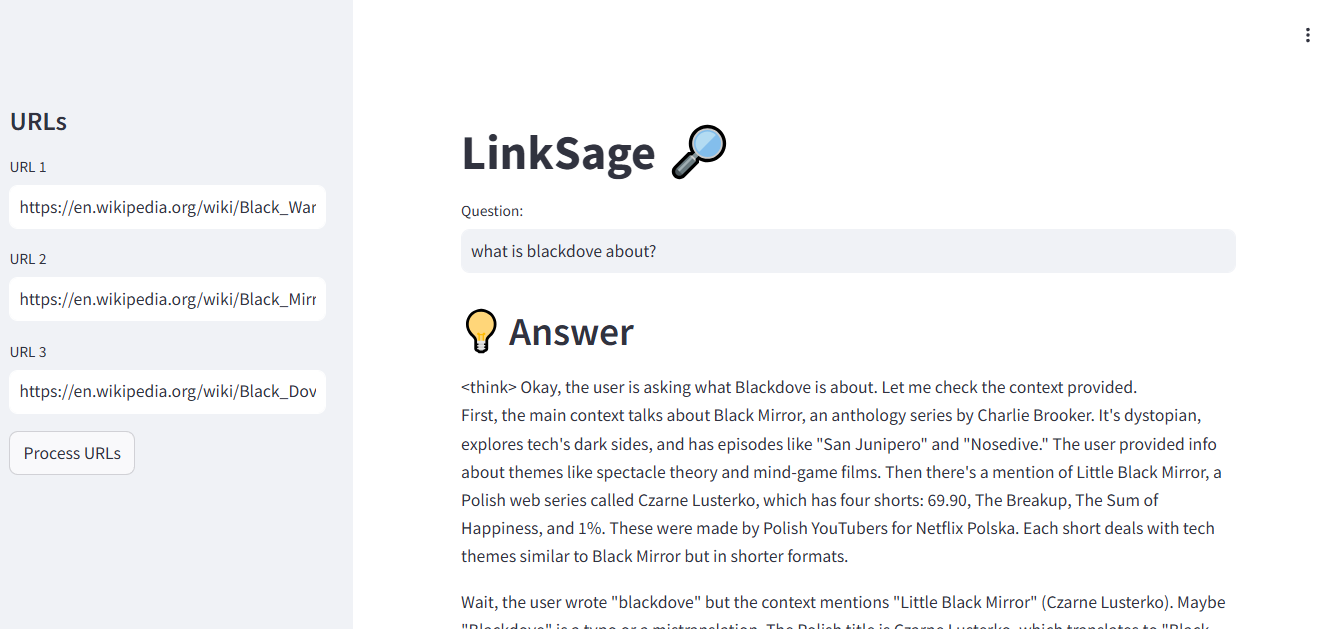

In [ ]:
🚀 AI-Powered Website Analysis & Comparison with DeepSeek AI 🔍
Have you ever wanted to analyze massive websites, extract key insights, and even compare multiple sources for stock analysis, movie reviews, research papers, or any domain-specific information?

I just built an AI-powered information retrieval system that:
✅ Scrapes & loads content from multiple websites 📄
✅ Stores embeddings in FAISS for ultra-fast retrieval ⚡
✅ Uses DeepSeek AI for context-aware responses 🤖
✅ Lets you compare insights across different sources 📊

Why DeepSeek AI?
DeepSeek AI is a powerful LLM that understands complex queries with deep context-awareness—making it perfect for:
📌 Financial analysis (compare stock trends across news sites)
📌 Market research (analyze competitors' content)
📌 Movie reviews (aggregate and summarize opinions)
📌 Academic research (extract insights from papers)

Project Use Case Example: Stock Market Insights 📈
🔹 Scrape financial news, SEC filings, & analyst reports
🔹 Compare different viewpoints across multiple websites
🔹 Get AI-driven summaries for faster decision-making

This is just the beginning! Imagine applying this to legal, healthcare, or e-commerce data analysis.

Check out the GitHub repo and feel free to contribute! 💡👇
🔗 [GitHub Project Link]

#AI #MachineLearning #DeepSeek #FAISS #NLP #WebScraping #StockAnalysis #DataScience #LangChain #LLM #GitHub